In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from math import pi, sqrt, e
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_state_qsphere, plot_bloch_multivector

In [2]:
sim = Aer.get_backend('aer_simulator')

In [3]:
sim1 = Aer.get_backend('statevector_simulator')

Matrices for zero and one states

In [4]:
zero = [1, 0]
one = [0, 1]

# Pauli Gates

### X- Gate

Pauli-X gate is equivalent to classical NOT gate w.r.t. standard basic |0>, |1> (z-axis) <br>
sometimes called bit-flip gate <br>
We can also think of X-gate as a rotation by π radians around the x-axis of the Bloch sphere <br>
<br>
The Pauli-X matrix is given by 
$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0><1| + |1><0| $$

$$ X|0> = |1> $$
$$ X|1> = |0> $$

In [5]:
x_gate = [[0, 1], [1, 0]]

In [6]:
x_one = np.dot(x_gate, zero)

In [7]:
(x_one == one).all()

True

In [8]:
x_zero = np.dot(x_gate, one)

In [9]:
(x_zero == zero).all()

True

### X-gate in qiskit

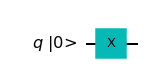

In [10]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl', initial_state=True)

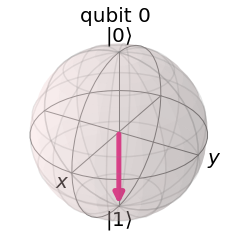

In [11]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

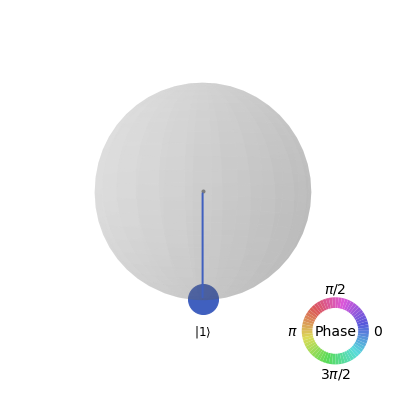

In [12]:
plot_state_qsphere(vec)

In [13]:
vec

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


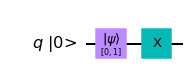

In [14]:
qc = QuantumCircuit(1)
qc.initialize(one)
qc.x(0)
qc.draw('mpl', initial_state=True)

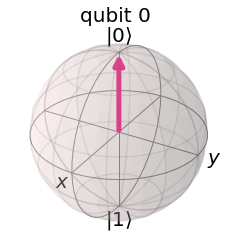

In [15]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

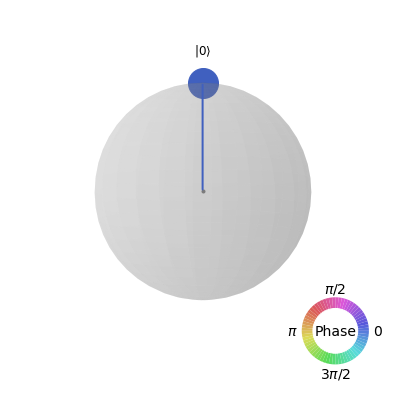

In [16]:
plot_state_qsphere(vec)

In [17]:
vec

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### Y-Gate

Pauli-Y gate makes rotation by π radians around the y-axis of the Bloch sphere <br>
<br>
The Pauli-Y matrix is given by 
$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0><1| + i|1><0| $$

$$ Y|0> = i|1> $$
$$ Y|1> = -i|0> $$

In [18]:
y_gate = [[0, -1j], [1j, 0]]

In [19]:
np.dot(y_gate, zero)

array([0.+0.j, 0.+1.j])

In [20]:
np.dot(y_gate, one)

array([0.-1.j, 0.+0.j])

### Y-gate in qiskit

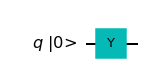

In [21]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl', initial_state=True)

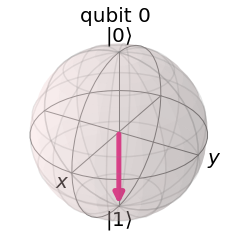

In [22]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [23]:
vec

Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


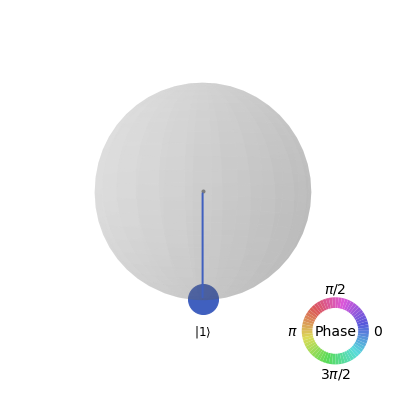

In [24]:
plot_state_qsphere(vec)

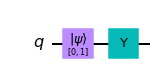

In [25]:
qc = QuantumCircuit(1)
qc.initialize(one)
qc.y(0)
qc.draw('mpl')

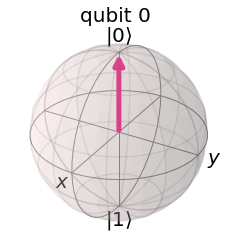

In [26]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [27]:
vec

Statevector([0.-1.j, 0.+0.j],
            dims=(2,))


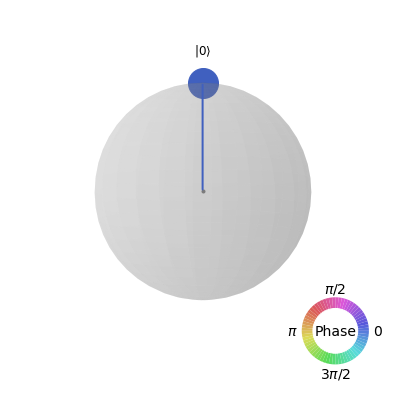

In [28]:
plot_state_qsphere(vec)

### Z-gate

Pauli-Z gate makes rotation by π radians around the z-axis of the Bloch sphere <br>
it is sometimes also referred as phase flip gate<br>
<br>
The Pauli-Z matrix is given by 
$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0><0| - |1><1| $$

$$ Z|0> = |0> $$
$$ Z|1> = -|1> $$

In [29]:
z_gate = [[1, 0], [0, -1]]

In [30]:
np.dot(z_gate, zero)

array([1, 0])

In [31]:
np.dot(z_gate, one)

array([ 0, -1])

### Z-gate in qiskit

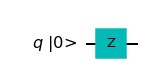

In [32]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl', initial_state=True)

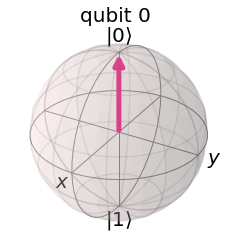

In [33]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [34]:
vec

Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


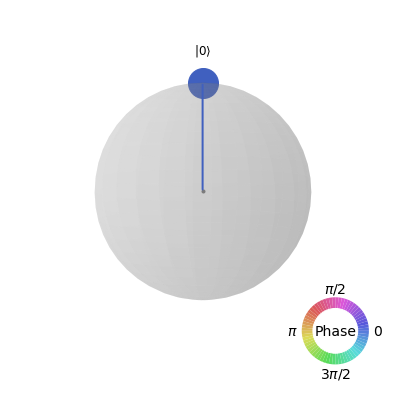

In [35]:
plot_state_qsphere(vec)

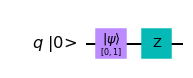

In [36]:
qc = QuantumCircuit(1)
qc.initialize(one)
qc.z(0)
qc.draw('mpl', initial_state=True)

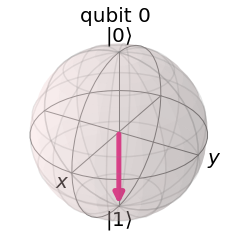

In [37]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [38]:
vec

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


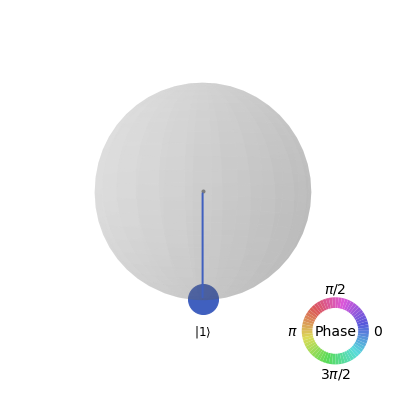

In [39]:
plot_state_qsphere(vec)

### Quick Exercises

1. Verify that |+⟩ and |−⟩ are in fact eigenstates of the X-gate.
2. What eigenvalues do they have?

In [40]:
x_plus = [1, 1]
x_neg = [1, -1]

X_gate matrix is given by:
<br>
$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$

By definition of eigenstates and eigenvalues:
<br>
$$ A\nu = \lambda\nu $$
$$ => (A-\lambda I)\nu = 0 $$
<br>
we can solve for eignevalues:
$$ |A-\lambda I| = 0 $$
<br>
For X-Gate:
<br>
$$ |X-\lambda I| = 0 $$
$$ => \det \begin{bmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} \end{bmatrix} = 0 $$
$$ => \det \begin{bmatrix} -\lambda & 1 \\ 1 & -\lambda \end{bmatrix} = 0 $$
$$ => \lambda^2 -1 = 0 $$
$$ => \lambda = \pm 1 $$
<br>
Eigenvalues for X-Gate are 1 and -1<br>
Now, lets solve for eignestates<br>
$$ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \begin{bmatrix} a \\ b \end{bmatrix} = 1 \begin{bmatrix} a \\ b \end{bmatrix}$$
=> a=b and b=a , so one eignestate is $$\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$ or state |+>
<br>
Similarly, using eigenvalue -1, we get a=-b and eignestate  $$\begin{bmatrix} 1 \\ -1 \end{bmatrix}$$ or state |->


In [41]:
# Calculating X * |+>
(x_plus == np.inner(x_gate, x_plus)).all()

True

In [42]:
# Calculating X * |->
(x_neg == -1 * np.inner(x_gate, x_neg)).all()

True

3. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere

$$ |Y-\lambda I| = 0 $$
$$ => \det \begin{bmatrix} \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix} \end{bmatrix} = 0 $$
$$ => \det \begin{bmatrix} -\lambda & -i \\ i & -\lambda \end{bmatrix} = 0 $$
$$ => \lambda^2 -1 = 0 $$
$$ => \lambda = \pm 1 $$
<br>
Eigenvalues for Y-Gate are 1 and -1<br>
Now, lets solve for eignestates<br>
$$ \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}  \begin{bmatrix} a \\ b \end{bmatrix} = 1 \begin{bmatrix} a \\ b \end{bmatrix}$$
=> -ib=a and ia=b , so one eignestate is $$\begin{bmatrix} 1 \\ i \end{bmatrix}$$ or state $|\circlearrowleft\rangle$
<br>
Similarly, using eigenvalue -1, we get ib=a and ia=-b which gives eignestate  $$\begin{bmatrix} 1 \\ -i \end{bmatrix}$$ or state $|\circlearrowright\rangle$

### H Gate

Hadamard Gate helps to put the qbit into superposition of |0⟩ and |1⟩<br>
<br>
H-Gate matrix is given by

$$ H = 1/\sqrt{2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = 1/\sqrt{2}(|0><0| + |0><1| +|1><0| - |1><1|) $$

$$ H|0> = |+> $$
$$ H|1> = |-> $$

In [43]:
h_gate = [[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]]

In [44]:
np.dot(h_gate, zero)

array([0.70710678, 0.70710678])

In [45]:
np.dot(h_gate, one)

array([ 0.70710678, -0.70710678])

### H-gate in qiskit

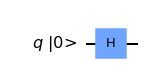

In [46]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl', initial_state=True)

In [47]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()

In [48]:
vec

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


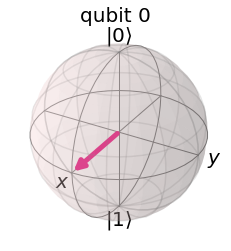

In [49]:
plot_bloch_multivector(vec)

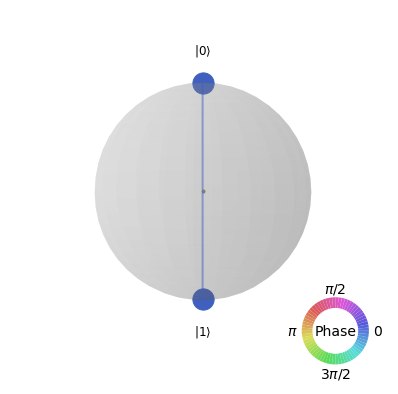

In [50]:
plot_state_qsphere(vec)

### Quick Exercise

1. Write the H-gate as the outer products of vectors |0⟩, |1⟩, |+⟩ and |−⟩. <br>
<br>
<br>
**ANS:**
$|H> = |+><0| + |-><1|$

In [51]:
(h_gate == np.outer([1/np.sqrt(2), 1/np.sqrt(2)], [1, 0]) + np.outer([1/np.sqrt(2), -1/np.sqrt(2)], [0, 1])).all()

True

2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.<br>
<br>
$$ X = HZH $$

In [52]:
np.inner(np.inner(h_gate, z_gate), h_gate)

array([[0., 1.],
       [1., 0.]])

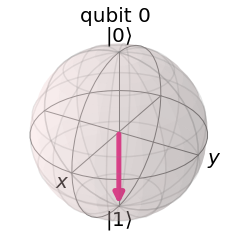

In [53]:
# Applying just x-gate
qc1 = QuantumCircuit(1)
qc1.x(0)
qc1.save_statevector()
qobj1 = assemble(qc1)
vec1 = sim.run(qobj1).result().get_statevector()
plot_bloch_multivector(vec1)

In [54]:
vec1

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


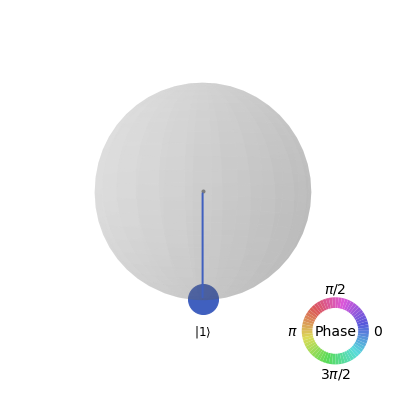

In [55]:
plot_state_qsphere(vec1)

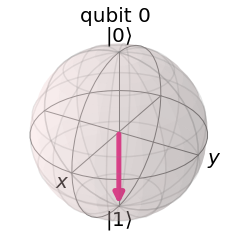

In [56]:
# Applying HZH gates
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.h(0)
qc1.save_statevector()
qobj1 = assemble(qc1)
vec1 = sim.run(qobj1).result().get_statevector()
plot_bloch_multivector(vec1)

In [57]:
vec1

Statevector([2.22044605e-16+6.123234e-17j, 1.00000000e+00-6.123234e-17j],
            dims=(2,))


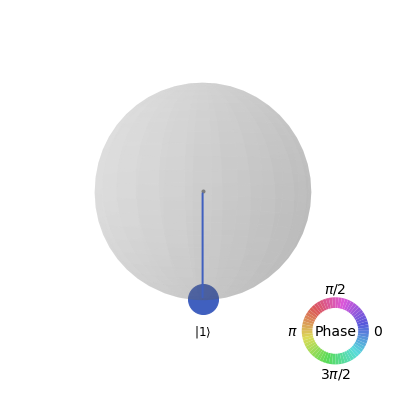

In [58]:
plot_state_qsphere(vec1)

3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).<br>
<br>
<br>
**ANS:**
$ Y = iXZ $

In [59]:
1j * np.inner(x_gate, z_gate)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [60]:
(y_gate == 1j * np.inner(x_gate, z_gate)).all()

True

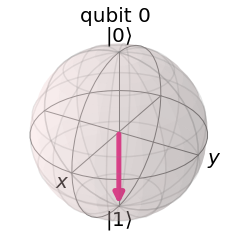

In [61]:
# applying y-gate
qc2 = QuantumCircuit(1)
qc2.y(0)
qc2.save_statevector()
qobj2 = assemble(qc2)
vec2 = sim.run(qobj2).result().get_statevector()
plot_bloch_multivector(vec2)

In [62]:
vec2

Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


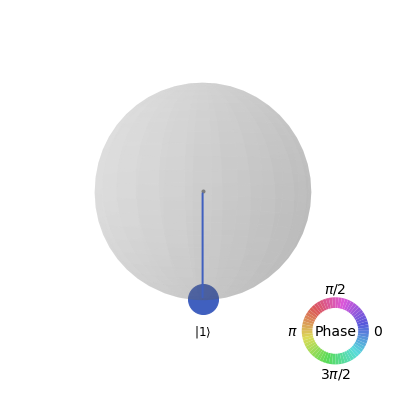

In [63]:
plot_state_qsphere(vec2)

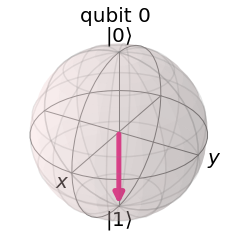

In [64]:
# applying XZ gates
qc2 = QuantumCircuit(1)
qc2.x(0)
qc2.z(0)
qc2.save_statevector()
qobj2 = assemble(qc2)
vec2 = sim.run(qobj2).result().get_statevector()
plot_bloch_multivector(vec2)

In [65]:
1j *vec2

Statevector([ 0.+0.j, -0.-1.j],
            dims=(2,))


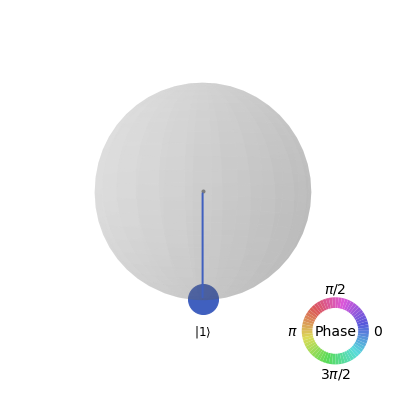

In [66]:
plot_state_qsphere(1j * vec2)

### Measuring in Different Bases

Measuring the |-> state in x-basis

In [67]:
def x_measurement(qc, qbit, cbit):
    qc.h(qbit)
    qc.measure(qbit, cbit)
    return qc

In [68]:
init_state = [1/sqrt(2), -1/sqrt(2)]

In [69]:
qc = QuantumCircuit(1, 1)

In [70]:
qc.initialize(init_state)

In [71]:
x_measurement(qc, 0, 0)

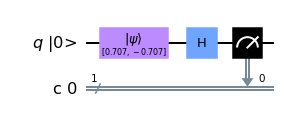

In [72]:
qc.draw('mpl', initial_state=True)

In [73]:
qobj = assemble(qc)

In [74]:
counts = sim.run(qobj).result().get_counts()

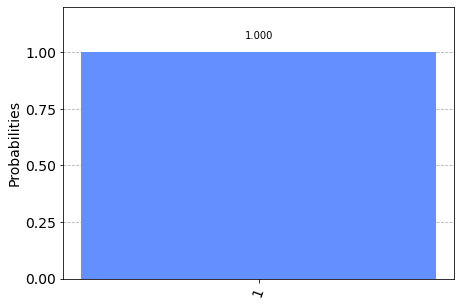

In [75]:
plot_histogram(counts)

### Exercise

1. If we initialize our qubit in the state |+⟩, what is the probability of measuring it in state |−⟩ <br>

In [76]:
init_state = [1/sqrt(2), 1/sqrt(2)]

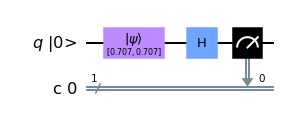

In [77]:
qc = QuantumCircuit(1, 1)
qc.initialize(init_state)
x_measurement(qc, 0, 0)
qc.draw('mpl', initial_state=True)

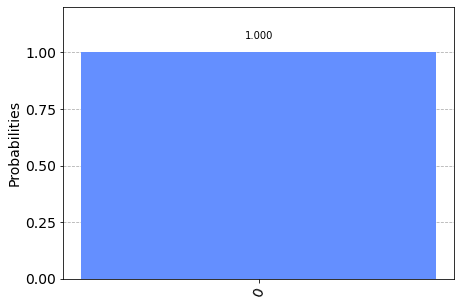

In [78]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

The probability of measuring it in the state |->  is 0, since all our measurements return 0 with probability 1, which correspond to the  state |+>.

2. Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩
  

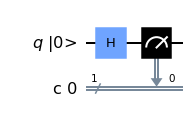

In [79]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl', initial_state=True)

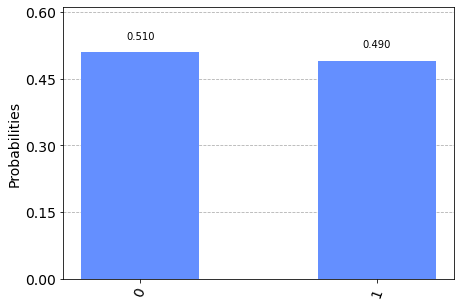

In [80]:
job = execute(qc, sim, shots=4096)
job_result = job.result()
res_counts = job_result.get_counts()
plot_histogram(res_counts)

probability of measuring state |0> and |1> in state |+> is 0.5, same is true for state |-> 

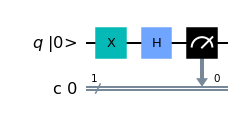

In [81]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl', initial_state=True)

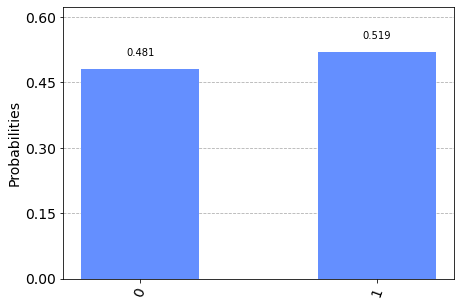

In [82]:
job = execute(qc, sim, shots=4096)
job_result = job.result()
res_counts = job_result.get_counts()
plot_histogram(res_counts)

3. Try to create a function that measures in the Y-basis.

Here, we want to create Y-measurement by transforming from the Y-basis to the Z-basis before our measurement. <br>
so the state $|\circlearrowleft\rangle$ transforms to |0> and state $|\circlearrowright\rangle$ to state |1> <br>
so, we can write:

$$ \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} 1 \\ i \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$
<br>
and
<br>
$$ \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} 1 \\ -i \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$
<br>
Solving , we get:
<br>
a = 1/2 <br>
b = 1/2i = $-i^2/2i$ = -i/2 <br>
c = 1/2 <br>
d = -1/2i = $i^2/2i$ = i/2 <br>
<br>
Giving us matrix:
<br>
$$ 1/2 \begin{bmatrix} 1 & -i \\ 1 & i \end{bmatrix} $$
<br>
There is gate called s-dagger(sdg) with matrix = $ \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/2} \end{bmatrix} $ = $ \begin{bmatrix} 1 & 0 \\ 0 & -i \end{bmatrix} $
<br>
Applying Hardamard after sdg gives us the required result:
<br>
$$ \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -i \end{bmatrix} = \begin{bmatrix} 1 & -i \\ 1 & i \end{bmatrix} $$

In [83]:
def y_measurement(qc, qbit, cbit):
    qc.sdg(qbit)
    qc.h(qbit)
    qc.measure(qbit, cbit)
    return qc

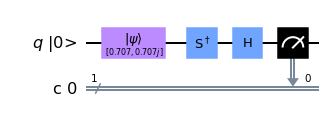

In [84]:
init_state = [1/sqrt(2), 1j/sqrt(2)]
qc = QuantumCircuit(1, 1)
qc.initialize(init_state)
y_measurement(qc, 0, 0)
qc.draw('mpl', initial_state=True)

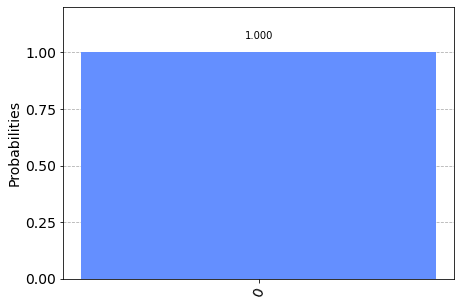

In [85]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

As expected, state $|\circlearrowleft\rangle$ measures(|0>) with probability 1 when measured Y-basis, same is true for state $|\circlearrowright\rangle$ (|1>)

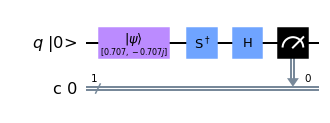

In [86]:
init_state = [1/sqrt(2), -1j/sqrt(2)]
qc = QuantumCircuit(1, 1)
qc.initialize(init_state)
y_measurement(qc, 0, 0)
qc.draw('mpl', initial_state=True)

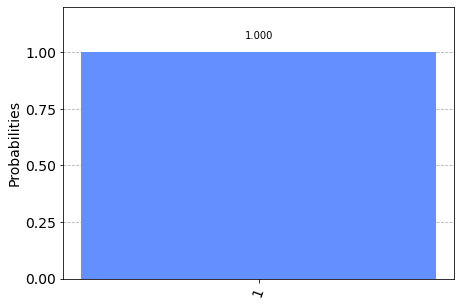

In [87]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

### The P-Gate

P-gate is parametrised by phase $\phi$, which performs rotation of angle $\phi$ around Z-axis. <br>
<br>
The matrix for P-Gate is given by:
<br>
$$ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix} , \phi \in \mathbb{R} $$

In [88]:
def p_gate(phi):
    p = [[1, 0], [0, np.exp(1j * phi)]]
    return p

In [89]:
# Rotation by pi/4 from state |+>, equivalent to T-gate
plus_45 = np.inner(p_gate(pi/4), [1/sqrt(2), 1/sqrt(2)])

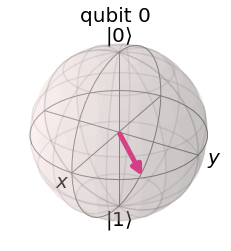

In [90]:
plot_bloch_multivector(plus_45)

In [91]:
# Rotation by pi/4 from state |->
minus_45 = np.inner(p_gate(pi/4), [1/sqrt(2), -1/sqrt(2)])

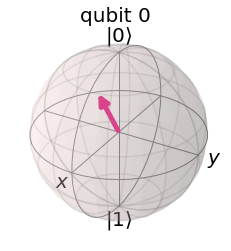

In [92]:
plot_bloch_multivector(minus_45)

### P-Gate in Qiskit

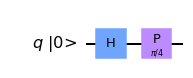

In [93]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(pi/4, 0)
qc.draw('mpl', initial_state=True)

In [94]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()

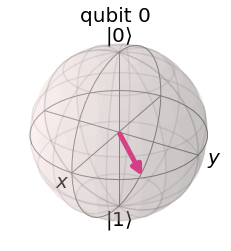

In [95]:
plot_bloch_multivector(vec)

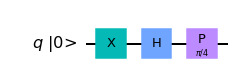

In [96]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.p(pi/4, 0)

qc.draw('mpl', initial_state=True)

In [97]:
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()

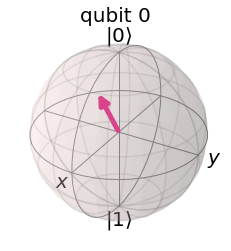

In [98]:
plot_bloch_multivector(vec)

### The I-Gate

Identity Gate.

In [99]:
IG  = [[1, 0], [0,1]]

In [100]:
assert((np.inner(IG, zero) == zero).all())

In [101]:
assert((np.inner(IG, one) == one).all())

### Quick Exercise

1. What are the eigenstates of the I-gate? 
<br>
**ANS** - The eigenvalue for identity gate is 1. So, any vector in 2-D Hilbert Space is eigenstate for identity-gate.

### The S-Gate

S-Gate is P-gate with $\phi = \pi/2$.
So, the matrix for S-gate is given by:
$$ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} =\begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$$
<br>
As, SS|a> = Z|a>, S-gate is sometimes called as $\sqrt{Z}$ Gate
<br>
S-gate is not its own inverse, there is $S\dagger$ gate which is inverseof the S-gate, given by:
<br>
$$S\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/2} \end{bmatrix} =\begin{bmatrix} 1 & 0 \\ 0 & -i \end{bmatrix}$$

In [102]:
s = [[1, 0], [0, np.exp(pi/2*1j)]]

In [103]:
s

[[1, 0], [0, (6.123233995736766e-17+1j)]]

In [104]:
sinv = [[1, 0], [0, np.exp(-pi/2*1j)]]

In [105]:
sinv

[[1, 0], [0, (6.123233995736766e-17-1j)]]

#### s and sdg are inverse, by showing applying first s and then sdg brings back to same state

In [106]:
np.inner(sinv, np.inner(s, zero))

array([1.+0.j, 0.+0.j])

In [107]:
np.inner(sinv, np.inner(s, one))

array([0.+0.j, 1.+0.j])

### S-Gate and SDG in QisKit

Applying s-gate to |+> , rotates it to state $|\circlearrowleft\rangle$

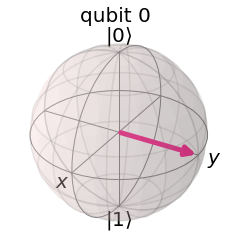

In [108]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [109]:
vec

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


Initializing in state $|\circlearrowleft\rangle$ and applying sdg brings it back to state |+>

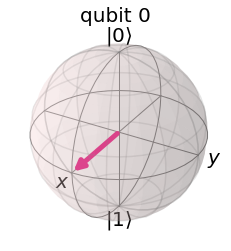

In [110]:
qc = QuantumCircuit(1)
qc.initialize(vec)
qc.sdg(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

Similar experiment with state |->

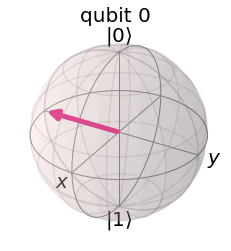

In [111]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.s(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [112]:
vec

Statevector([ 7.07106781e-01-8.65956056e-17j,
             -8.65956056e-17-7.07106781e-01j],
            dims=(2,))


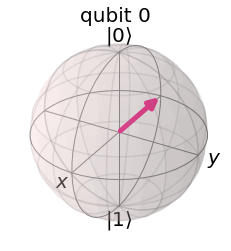

In [113]:
qc = QuantumCircuit(1)
qc.initialize(vec)
qc.sdg(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

### The T-Gate

T-Gate is P-gate with $\phi = \pi/4$.
So, the matrix for T-gate is given by:
$$ \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$$
<br>
As,TTTT|a> = Z|a>, T-gate is sometimes called as $\sqrt[4]{S}$ Gate
<br>
T-gate is not its own inverse, there is $T\dagger$ gate which is inverse of the T-gate, given by:
<br>
$$T\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{bmatrix}$$

In [114]:
t = [[1, 0], [0, np.exp(pi/4*1j)]]

In [115]:
t

[[1, 0], [0, (0.7071067811865476+0.7071067811865475j)]]

In [116]:
tinv = [[1, 0], [0, np.exp(-pi/4*1j)]]

In [117]:
tinv

[[1, 0], [0, (0.7071067811865476-0.7071067811865475j)]]

#### t and tdg are inverse, by showing applying first t and then tdg brings back to same state

In [118]:
np.inner(tinv, np.inner(t, zero))

array([1.+0.j, 0.+0.j])

In [119]:
np.inner(tinv, np.inner(t, one))

array([0.+0.00000000e+00j, 1.+1.01465364e-17j])

### T-Gate and TDG in QisKit

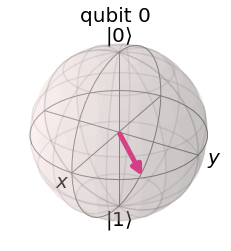

In [120]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

In [121]:
vec

Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


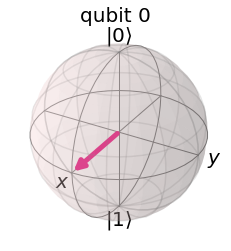

In [122]:
qc = QuantumCircuit(1)
qc.initialize(vec)
qc.tdg(0)
qc.save_statevector()
qobj = assemble(qc)
vec = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(vec)

### The U-gate

U-gate is the most general of all single-qubit quantum gates.<br>
It is a parametrised gate of the form: <br>
<br>
$$ U(\theta, \phi, \lambda) = \begin{bmatrix} cos(\theta/2) & -e^{i\lambda}sin(\theta/2) \\ e^{i\phi}sin(\theta/2) & e^{i(\phi + \lambda)}cos(\theta/2) \end{bmatrix}$$
<br>
Every Gate described above can be expressed as $U(\theta, \phi, \lambda)$

#### X-Gate described as U gate

$$ U(\pi, 0, \pi) = \begin{bmatrix} cos(\pi/2) & -e^{i\pi}sin(\pi/2) \\ e^{i0}sin(\pi/2) & e^{i(0 + \pi)}cos(\pi/2) \end{bmatrix} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} = X$$

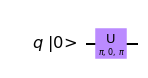

In [123]:
qc = QuantumCircuit(1)
qc.u(pi, 0, pi, 0)
qc.draw('mpl', initial_state=True)

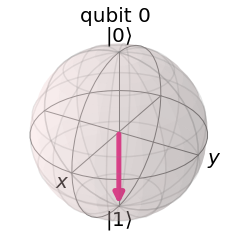

In [124]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

#### Y-Gate described as U gate

$$ U(\pi, \pi/2, \pi/2) = \begin{bmatrix} cos(\pi/2) & -e^{i\pi/2}sin(\pi/2) \\ e^{i\pi/2}sin(\pi/2) & e^{i(\pi/2 + \pi/2)}cos(\pi/2) \end{bmatrix} = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = Y$$

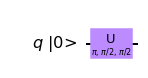

In [125]:
qc = QuantumCircuit(1)
qc.u(pi, pi/2, pi/2, 0)
qc.draw('mpl', initial_state=True)

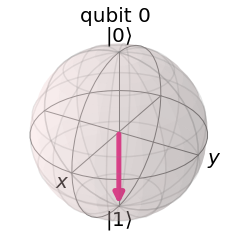

In [126]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [127]:
state

Statevector([6.123234e-17+0.j, 6.123234e-17+1.j],
            dims=(2,))


#### Z-Gate described as U gate

$$ U(0, \pi, 0) = \begin{bmatrix} cos(0) & -e^{0}sin(0) \\ e^{i\pi}sin(0) & e^{i(\pi)}cos(0) \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = Z$$

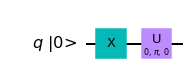

In [128]:
qc = QuantumCircuit(1)
qc.x(0)
qc.u(0, pi, 0, 0)
qc.draw('mpl', initial_state=True)

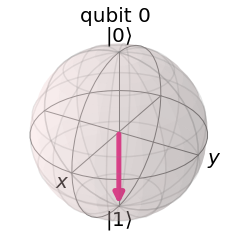

In [129]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [130]:
state

Statevector([ 0.+0.0000000e+00j, -1.+1.2246468e-16j],
            dims=(2,))


#### H-Gate described as U gate

$$ U(\pi/2, 0, \pi) = \begin{bmatrix} cos(\pi/4) & -e^{i\pi}sin(\pi/4) \\ e^{0}sin(\pi/4) & e^{i(\pi)}cos(\pi/4) \end{bmatrix} = 1/\sqrt{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = H$$

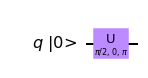

In [131]:
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw('mpl', initial_state=True)

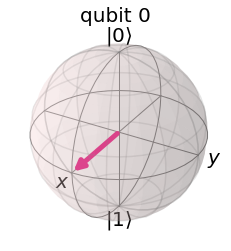

In [132]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

#### P-Gate described as U gate

$$ U(0, 0, \lambda) = \begin{bmatrix} cos(0) & -e^{i\lambda}sin(0) \\ e^{0}sin(0) & e^{i(\lambda)}cos(0) \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{bmatrix} = P$$

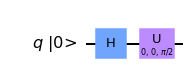

In [133]:
qc = QuantumCircuit(1)
qc.h(0)
qc.u(0, 0, pi/2, 0)
qc.draw('mpl', initial_state=True)

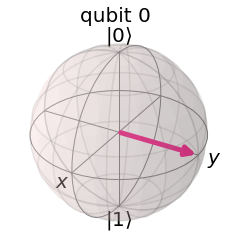

In [134]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [135]:
import qiskit.tools.jupyter
%qiskit_version_table